In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse.linalg import eigs



/Users/eunicehan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


[0.99973579 2.9990026  4.99846305 6.997581   8.99625425]


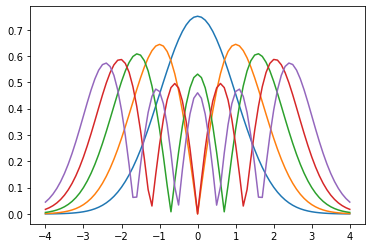

In [2]:
## Part a)

A1 = []
A2 = []

K = 1
L = 4

def shoot(x, phi, epsilon):
    return [phi[1], (K * x ** 2 - epsilon) * phi[0]]

xspan = np.arange(-L, L + 0.1, 0.1) 
col = ['r', 'b', 'g', 'c', 'm', 'k']
tol = 1e-4
initial_epsilon = 0.1



for modes in range(1,6):
    epsilon = initial_epsilon
    d_epsilon = 0.2
    for i in range(1000):
        A = np.sqrt(K * L ** 2 - epsilon)
        phi0 = [1,A]

        #phi = odeint(shoot, phi0, xspan, args=(epsilon,))
        sol = solve_ivp(lambda x, phi: shoot(x, phi, epsilon), [xspan[0], xspan[-1]], phi0, t_eval=xspan)

        phi = sol.y.T
        x = sol.t

        alpha = np.sqrt(K * L ** 2 - epsilon)


        if abs(phi[-1,1] + alpha * phi[-1,0]) < tol:
            #print(epsilon)
            break

        if (-1) ** (modes+1) * (phi[-1,1] + alpha * phi[-1,0]) > 0:
            epsilon += d_epsilon
        else:
            epsilon -= d_epsilon/2
            d_epsilon /= 2


    initial_epsilon = epsilon + 0.2
    norm = np.trapz(phi[:,0] ** 2, xspan)
    norm_eigenfun = np.abs(phi[:,0] / np.sqrt(norm))


    A1.append(norm_eigenfun)
    A2.append(epsilon)
    plt.plot(xspan, norm_eigenfun)

A1 = np.array(A1).T
A2 = np.array(A2)


rows, columns = A1.shape
print(A2)


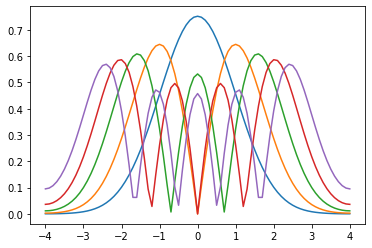

In [3]:
## Part b)

A3 = []
A4 = []

K_b = 1
L_b = 4
N_b = 81

xspan_b = np.linspace(-L_b, L_b, N_b) 
tol = 1e-4


delta_x_b = 0.1 
A_b = np.zeros((N_b - 2, N_b - 2))



for i in range(N_b - 2):
    
    A_b[i, i] = -2 - ((delta_x_b ** 2) * (K_b * xspan_b[i+1] ** 2))
    if i < N_b - 3:
        A_b[i, i+1] = 1 
        A_b[i+1, i] = 1



A_b[0, 0] += 4/3    
A_b[-1, -1] += 4/3     
A_b[0, 1] -= 1/3
A_b[-1, -2] -= 1/3




np.set_printoptions(threshold=np.inf)


eigenvalues, eigenvectors = eigs(-A_b, which="SM")

new_eigenvectors = np.vstack([4/3 * eigenvectors[0,:] - 1/3 * eigenvectors[1,:], 
                              eigenvectors, 
                              4/3 * eigenvectors[-1,:] - 1/3 * eigenvectors[-2,:]])


final_eigenvectors = np.zeros((N_b,5))
final_eigenvalues = np.zeros(5)

# normalize
for j in range(5):
    norm = np.sqrt(np.trapz(new_eigenvectors[:,j]**2, xspan_b))
    final_eigenvectors[:, j] = np.abs(new_eigenvectors[:, j] / norm)


final_eigenvalues = np.sort(eigenvalues[:5]  / (delta_x_b ** 2)) 

plt.plot(xspan_b, final_eigenvectors)

A3 = final_eigenvectors
A4 = np.real(final_eigenvalues)



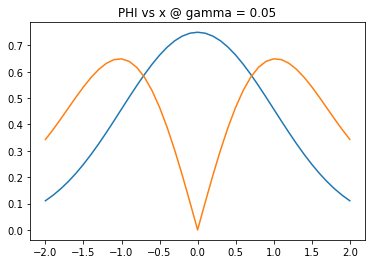

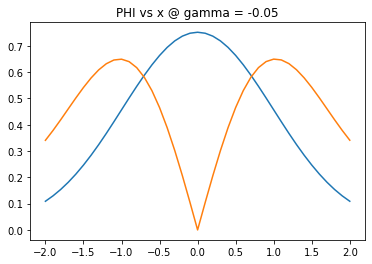

In [4]:
## Part c)
def shoot_c(x, phi, epsilon_c, gamma):
    return [phi[1], (gamma * phi[0]**2 + x**2 - epsilon_c) * phi[0]]


L_c = 2
xspan_c = np.arange(-L_c, L_c + 0.1, 0.1)
n_c = len(xspan_c)

eigenval_pos = np.zeros(2)
eigenval_neg = np.zeros(2)
phi_pos = np.zeros((n_c, 2))
phi_neg = np.zeros((n_c, 2))

for gamma_c in [0.05, -0.05]:
    initial_E = 0.1
    A = 1e-6

    for modes_c in range(2):
        dA = 0.01

        for jj in range(100):
            epsilon_c = initial_E
            dE = 0.2

            for j in range(100):
                phi0 = [A, np.sqrt(L_c**2 - epsilon_c) * A]
                sol = solve_ivp(lambda x, phi: shoot_c(x, phi, epsilon_c, gamma_c), [xspan_c[0], xspan_c[-1]], phi0, t_eval=xspan_c)
                phi_sol = sol.y.T
                x_sol = sol.t
                
                boundary_cond = phi_sol[-1, 1] + np.sqrt(L_c ** 2 - epsilon_c) * phi_sol[-1, 0]

                
                if abs(boundary_cond) < tol:
                    break
                
                if (-1)**(modes_c) * boundary_cond > 0:
                    epsilon_c += dE
                else:
                    epsilon_c -= dE
                    dE /= 2

            area = np.trapz(phi_sol[:, 0] ** 2, x_sol)


            if abs(area - 1) < tol:
                break

            if area < 1:
                A += dA
            else:
                A -= dA / 2
                dA /= 2

        initial_E = epsilon_c + 0.2
        
        if gamma_c > 0:
            eigenval_pos[modes_c] = epsilon_c
            phi_pos[:, modes_c] = np.abs(phi_sol[:, 0])
        else:
            eigenval_neg[modes_c] = epsilon_c
            phi_neg[:, modes_c] = np.abs(phi_sol[:, 0])
            

A5 = phi_pos
A6 = eigenval_pos
A7 = phi_neg
A8 = eigenval_neg





plt.plot(xspan_c, phi_pos)    
plt.title("PHI vs x @ gamma = 0.05")
plt.show()

plt.plot(xspan_c,phi_neg)
plt.title("PHI vs x @ gamma = -0.05")
plt.show()

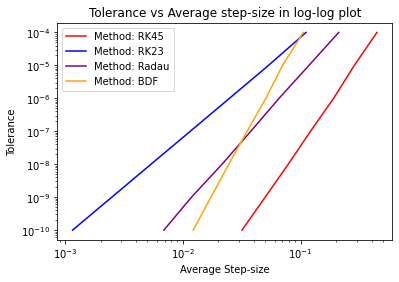

slope_RK45: 5.24466756177217
slope_RK23: 3.0190995295045018
slope_Radau: 4.038199269261615
slope_BDF: 6.457512609631297


In [5]:
## Part d)

K_d = 1
epsilon_d = 1
gamma_d = 0 

L_d = 2
xspan_d = [-L_d, L_d, 41]



tolerance = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]


def shoot_d(x, phi, epsilon):
    return [phi[1], (gamma_d * np.abs(phi[0]) ** 2 + K_d * x ** 2 - epsilon) * phi[0]]  

sol_RK45_xaxis = []
sol_RK23_xaxis = []
sol_Radau_xaxis = []
sol_BDF_xaxis = []

for tol in tolerance:
    phi0_d = [1, np.sqrt(K_d * L_d ** 2 - 1)]
    options = {'rtol':tol, 'atol': tol}
    sol_RK45 = solve_ivp(shoot_d, [-L_d, L_d], phi0_d, method='RK45', args=(epsilon_d,), **options)
    sol_RK23 = solve_ivp(shoot_d, [-L_d, L_d], phi0_d, method='RK23', args=(epsilon_d,), **options)
    sol_Radau = solve_ivp(shoot_d, [-L_d, L_d], phi0_d, method='Radau', args=(epsilon_d,), **options)
    sol_BDF = solve_ivp(shoot_d, [-L_d, L_d], phi0_d, method='BDF', args=(epsilon_d,), **options)
    

    RK45_ave_stepsize = np.mean(np.diff(sol_RK45.t)); sol_RK45_xaxis.append(RK45_ave_stepsize)
    RK23_ave_stepsize = np.mean(np.diff(sol_RK23.t)); sol_RK23_xaxis.append(RK23_ave_stepsize)
    Radau_ave_stepsize = np.mean(np.diff(sol_Radau.t)); sol_Radau_xaxis.append(Radau_ave_stepsize)
    BDF_ave_stepsize = np.mean(np.diff(sol_BDF.t)); sol_BDF_xaxis.append(BDF_ave_stepsize)    



plt.plot(sol_RK45_xaxis, tolerance, color='red', label='Method: RK45')
plt.plot(sol_RK23_xaxis, tolerance, color='blue', label='Method: RK23')
plt.plot(sol_Radau_xaxis, tolerance, color='purple', label='Method: Radau')
plt.plot(sol_BDF_xaxis, tolerance, color='orange', label='Method: BDF')

plt.xlabel('Average Step-size')
plt.ylabel('Tolerance')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Tolerance vs Average step-size in log-log plot')
plt.show()

# Get slopes
slope_RK45 = np.polyfit(np.log(sol_RK45_xaxis), np.log(tolerance), 1)[0]
slope_RK23 = np.polyfit(np.log(sol_RK23_xaxis), np.log(tolerance), 1)[0]
slope_Radau = np.polyfit(np.log(sol_Radau_xaxis), np.log(tolerance), 1)[0]
slope_BDF = np.polyfit(np.log(sol_BDF_xaxis), np.log(tolerance), 1)[0]


ans_l = [slope_RK45, slope_RK23, slope_Radau, slope_BDF]

A9 = np.array(ans_l)


print("slope_RK45:",slope_RK45)
print("slope_RK23:",slope_RK23)
print("slope_Radau:",slope_Radau)
print("slope_BDF:",slope_BDF)


In [6]:
A9.shape

(4,)

[4.57692814e-08 1.72430946e-07 2.47861359e-07 4.35421341e-07
 1.96490935e-06]
[0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
[2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
[0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


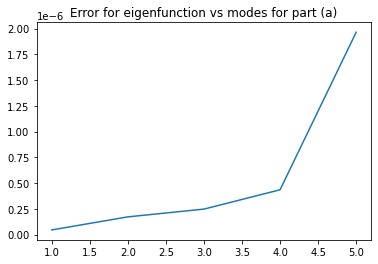

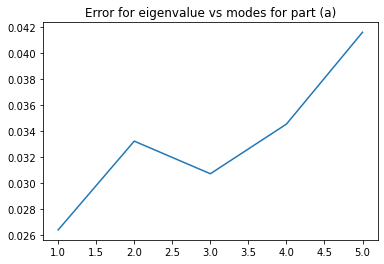

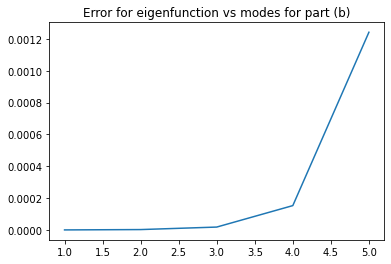

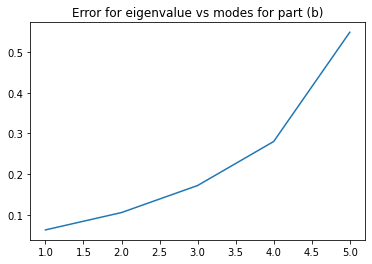

In [7]:
## Part e)

L_e = 4
xspan_e = np.arange(-L_e, L_e + 0.1, 0.1)
n_e = len(xspan_e)

# Gauss-Hermite polynomial solution
H = np.array([np.ones_like(xspan_e), 
              2 * xspan_e, 
              4 * xspan_e ** 2 -2, 
              8 * xspan_e ** 3 - 12 * xspan_e,
              16 * xspan_e ** 4 - 48 * xspan_e ** 2 + 12])

# Get factorial function
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Exact sol
phi_e = np.zeros((n_e, 5))
for j in range(5):
    phi_e[:, j] = (np.exp(-xspan_e ** 2 / 2) * H[j, :] / (np.sqrt(factorial(j) * 2 ** j * np.sqrt(np.pi)))).T
    

eigenfun_E_a = np.zeros(5)
eigenfun_E_b = np.zeros(5)
eigenval_E_a = np.zeros(5)
eigenval_E_b = np.zeros(5)
k_l = [1,2,3,4,5]

# Get errors
for k in range(5):
    eigenfun_E_a[k] = np.trapz((abs(A1[:,k]) - abs(phi_e[:, k]))**2, xspan_e)
    eigenfun_E_b[k] = np.trapz((abs(A3[:,k]) - abs(phi_e[:, k]))**2, xspan_e)
    theoretical_energy = (2 * k_l[k] - 1)
    # print(theoretical_energy)
    eigenval_E_a[k] = 100 * (abs(A2[k] - theoretical_energy) / theoretical_energy)
    eigenval_E_b[k] = 100 * (abs(A4[k] - theoretical_energy) / theoretical_energy)



A10 = eigenfun_E_a; A11 = eigenval_E_a; A12 = eigenfun_E_b; A13 = eigenval_E_b
print(A10)
print(A11)
print(A12)
print(A13)


## Plotting 
plt.plot([1,2,3,4,5], A10)
plt.title("Error for eigenfunction vs modes for part (a)")
plt.show()

plt.plot([1,2,3,4,5], A11)
plt.title("Error for eigenvalue vs modes for part (a)")
plt.show()

plt.plot([1,2,3,4,5], A12)
plt.title("Error for eigenfunction vs modes for part (b)")
plt.show()

plt.plot([1,2,3,4,5], A13)
plt.title("Error for eigenvalue vs modes for part (b)")
plt.show()


